# Prediction of Credit Card Payment Defaults

We will use the "Default of Credit Card Clients" dataset available on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients).

This dataset contains information about payment defaults, demographic factors, credit data, payment history, and credit card bills for 30,000 clients in Taiwan from April 2005 to September 2005.

Dataset contains 25 variables:

- **ID**: Client ID
- **LIMIT_BAL**: Maximum credit limit granted in NT dollars
- **SEX**: Client’s gender (1 = male, 2 = female)
- **EDUCATION**: Education level (1 = graduate school, 2 = university, 3 = high school, 4 = others)
- **MARRIAGE**: Marital status (1 = married, 2 = single, 3 = others)
- **AGE**: Age
- **PAY_0**: Repayment status in September 2005 (-1 = payment made, 1 = 2-month delay, ..., 9 = 9-month or more delay)
- **PAY_2**: Repayment status in August 2005
- **PAY_3**: Repayment status in July 2005
- **PAY_4**: Repayment status in June 2005
- **PAY_5**: Repayment status in May 2005
- **PAY_6**: Repayment status in April 2005
- **BILL_AMT1**: Bill amount in September 2005 (in NT dollars)
- **BILL_AMT2**: Bill amount in August 2005
- **BILL_AMT3**: Bill amount in July 2005
- **BILL_AMT4**: Bill amount in June 2005
- **BILL_AMT5**: Bill amount in May 2005
- **BILL_AMT6**: Bill amount in April 2005
- **PAY_AMT1**: Previous payment amount in September 2005 (in NT dollars)
- **PAY_AMT2**: Previous payment amount in August 2005
- **PAY_AMT3**: Previous payment amount in July 2005
- **PAY_AMT4**: Previous payment amount in June 2005
- **PAY_AMT5**: Previous payment amount in May 2005
- **PAY_AMT6**: Previous payment amount in April 2005
- **default.payment.next.month**: Payment default in October 2005 (1 = yes, 0 = no)




### Variable Definitions

This research use a binary variable, **default payment** (Yes = 1, No = 0), as the response variable. Based on literature, 23 variables were selected as explanatory variables:

- **X1**: Amount of given credit (NT dollar), including both individual consumer credit and family (supplementary) credit.
- **X2**: Gender (1 = male, 2 = female)
- **X3**: Education level (1 = graduate school, 2 = university, 3 = high school, 4 = others)
- **X4**: Marital status (1 = married, 2 = single, 3 = others)
- **X5**: Age (in years)
- **X6 - X11**: History of past payment. Monthly repayment records from April to September 2005:
  - **X6**: Repayment status in September 2005
  - **X7**: Repayment status in August 2005
  - ...
  - **X11**: Repayment status in April 2005

  *Repayment status scale*: -1 = paid duly, 1 = 1-month delay, 2 = 2-month delay, ..., 8 = 8-month delay, 9 = 9 months or more delay

- **X12 - X17**: Amount of bill statements (NT dollars) from April to September 2005:
  - **X12**: Bill amount in September 2005
  - **X13**: Bill amount in August 2005
  - ...
  - **X17**: Bill amount in April 2005

- **X18 - X23**: Amount of previous payments (NT dollars) from April to September 2005:
  - **X18**: Amount paid in September 2005
  - **X19**: Amount paid in August 2005
  - ...
  - **X23**: Amount paid in April 2005



### Preprocessing
The dataset is in XLS format, and we will convert it to CSV for usage.

We will also remove the first line, which contains the column names (X1, ..., Y).


In [57]:
import pandas as pd
df = pd.read_excel('default of credit card clients.xls', skiprows=[0])
#df = df.drop(df.columns[0], axis=1)
#df.columns = df.columns.str.replace('default payment next month', 'DEFAULT_PAYMENT')

#df.to_csv('default_credit_card_clients.csv', index=False)

df = pd.read_csv('default_credit_card_clients.csv')

We removed the first column and the first row as they do not add value to the analysis.


In [59]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_PAYMENT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   LIMIT_BAL        30000 non-null  int64
 1   SEX              30000 non-null  int64
 2   EDUCATION        30000 non-null  int64
 3   MARRIAGE         30000 non-null  int64
 4   AGE              30000 non-null  int64
 5   PAY_0            30000 non-null  int64
 6   PAY_2            30000 non-null  int64
 7   PAY_3            30000 non-null  int64
 8   PAY_4            30000 non-null  int64
 9   PAY_5            30000 non-null  int64
 10  PAY_6            30000 non-null  int64
 11  BILL_AMT1        30000 non-null  int64
 12  BILL_AMT2        30000 non-null  int64
 13  BILL_AMT3        30000 non-null  int64
 14  BILL_AMT4        30000 non-null  int64
 15  BILL_AMT5        30000 non-null  int64
 16  BILL_AMT6        30000 non-null  int64
 17  PAY_AMT1         30000 non-null  int64
 18  PAY_AM

We confirm dataset has 30,000 rows, now has 24 columns, and only contains numeric (int) values.

Our variable of interest is DEFAULT, which we need to predict.


### Missing Values

In [61]:
df.isnull().sum()

,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0
PAY_5,0


### Exploring and understanding the nature of our data

In [62]:
# Unique categories in "Education"
print("Unique categories in 'Education':", df['EDUCATION'].unique())

# Unique categories in "Marital Status"
print("Unique categories in 'Marital Status':", df['MARRIAGE'].unique())

# Unique categories in "Gender"
print("Unique categories in 'Gender':", df['SEX'].unique())

# Unique categories in "PAY_0"
print("Unique categories in 'PAY_0':", df['PAY_0'].unique())

Unique categories in 'Education': [2 1 3 5 4 6 0]
Unique categories in 'Marital Status': [1 2 3 0]
Unique categories in 'Gender': [2 1]
Unique categories in 'PAY_0': [ 2 -1  0 -2  1  3  4  8  7  5  6]


In [63]:
education_counts = df['EDUCATION'].value_counts()
print("Education Counts:\n", education_counts)

Education Counts:
 EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64


X3: Education level (1 = graduate school, 2 = university, 3 = high school, 4 = others)

In [64]:
# Filtrar el dataset eliminando filas con EDUCATION en [0, 5, 6]
df = df[df['EDUCATION'].isin([1, 2, 3, 4])]

# Verificar los valores únicos restantes
print(df['EDUCATION'].unique())
print(df.shape)


[2 1 3 4]
(29655, 24)


In [65]:
total_count = education_counts.sum()
# Calculate the percentage for each category
education_percentage = (education_counts / total_count) * 100
print(education_percentage)

EDUCATION
2    46.766667
1    35.283333
3    16.390000
5     0.933333
4     0.410000
6     0.170000
0     0.046667
Name: count, dtype: float64


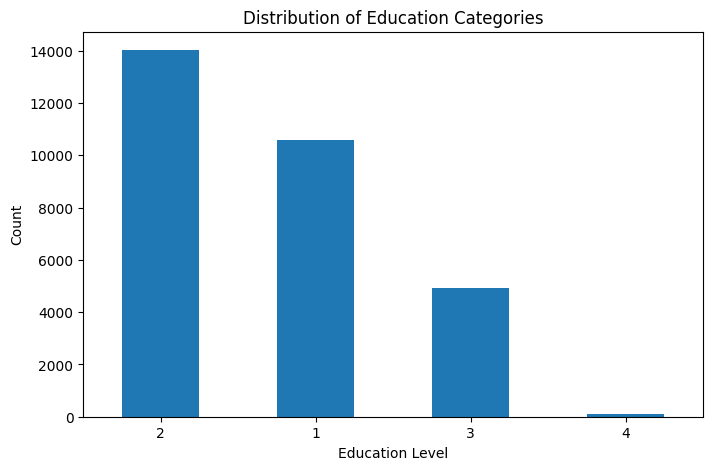

In [66]:
import matplotlib.pyplot as plt

# Conteo de cada categoría en 'EDUCATION'
education_counts = df['EDUCATION'].value_counts()

# Creación del gráfico de barras
plt.figure(figsize=(8, 5))
education_counts.plot(kind='bar')
plt.title('Distribution of Education Categories')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [68]:
# Unique categories in "DEFAULT"
print("Unique categories in 'Default':", df['DEFAULT_PAYMENT'].unique())

Unique categories in 'Default': [1 0]


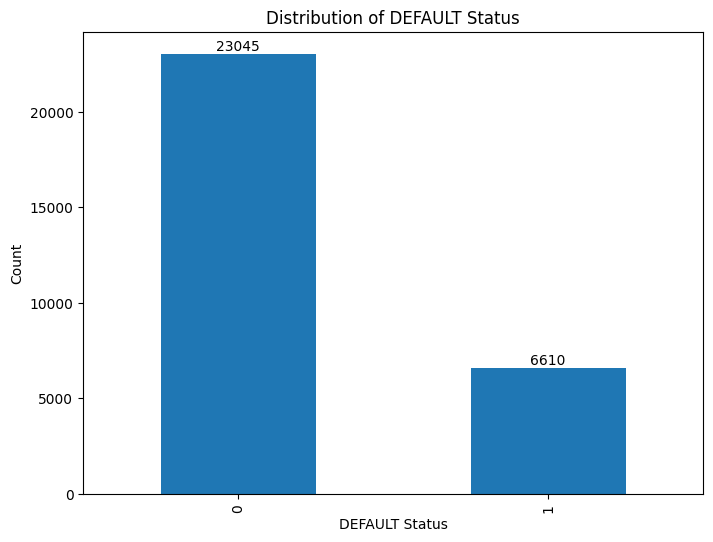

In [71]:
plt.figure(figsize=(8, 6))

ax = df['DEFAULT_PAYMENT'].value_counts().plot(kind='bar')
plt.title("Distribution of DEFAULT Status")
plt.xlabel("DEFAULT Status")
plt.ylabel("Count")

# Agregar etiquetas a las barras
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,  # Posición x
        p.get_height(),                # Posición y
        int(p.get_height()),           # Texto (altura de la barra)
        ha='center',                   # Alineación horizontal
        va='bottom'                    # Alineación vertical
    )

plt.show()

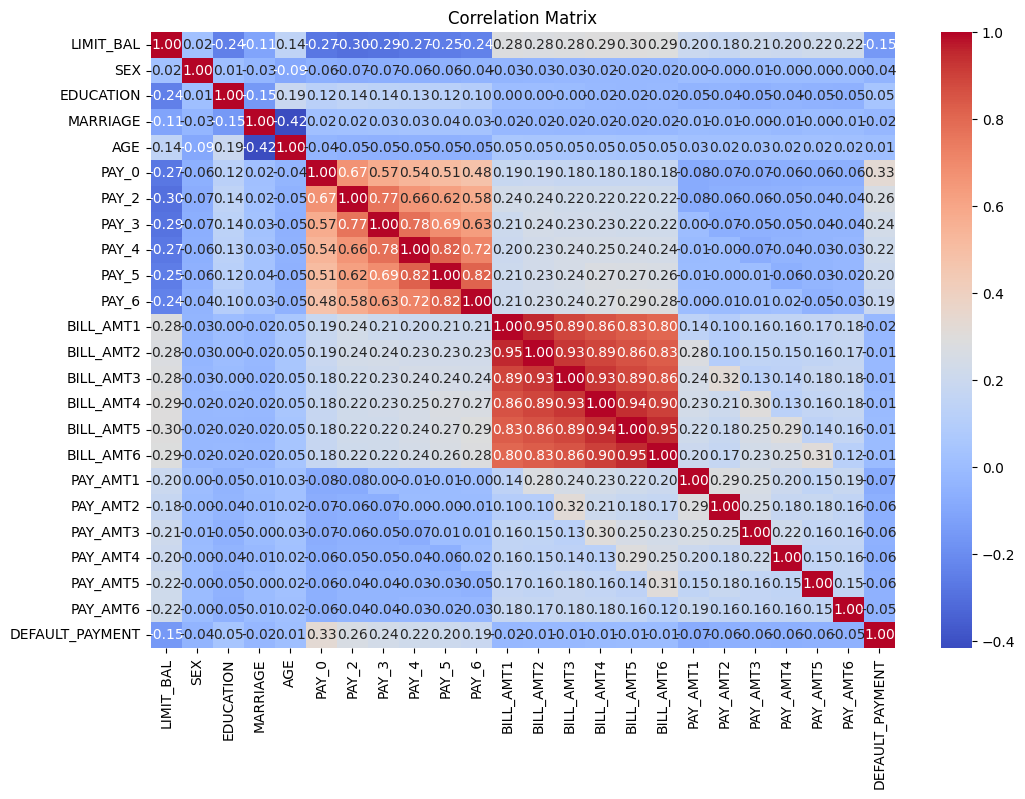

In [74]:
import seaborn as sns

# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()

### Summary for Predicting `DEFAULT_PAYMENT`:

**Critical Variables:**  
Payment delays (`PAY_0` to `PAY_6`) are the most important features. Among them, `PAY_0` stands out as the most predictive.

**Less Relevant Variables:**  
Factors like gender (`SEX`), education level (`EDUCATION`), marital status (`MARRIAGE`), and age (`AGE`) have minimal influence and could be discarded or used as secondary features.
